
# Deep Learning Classifier for The Human Freedom Index

This notebook contains a set of exercises that will guide you through the different steps of this assignment. Solutions need to be code-based, _i.e._ hard-coded or manually computed results will not be accepted. Remember to write your solutions to each exercise in the dedicated cells and to not modify the test cells. When you are done completing all the exercises submit this same notebook back to moodle in **.ipynb** format.

<div class="alert alert-success">

The <a href="https://www.cato.org/human-freedom-index/2021 ">Human Freedom Index</a> measures economic freedoms such as the freedom to trade or to use sound money, and it captures the degree to which people are free to enjoy the major freedoms often referred to as civil liberties—freedom of speech, religion, association, and assembly— in the countries in the survey. In addition, it includes indicators on rule of law, crime and violence, freedom of movement, and legal discrimination against same-sex relationships. We also include nine variables pertaining to women-specific freedoms that are found in various categories of the index.

<u>Citation</u>

Ian Vásquez, Fred McMahon, Ryan Murphy, and Guillermina Sutter Schneider, The Human Freedom Index 2021: A Global Measurement of Personal, Civil, and Economic Freedom (Washington: Cato Institute and the Fraser Institute, 2021).
    
</div>


<div class="alert alert-danger"><b>Submission deadline:</b> Sunday, February 26th, 23:55</div>


In [1]:
import numpy as np
import pandas as pd

<div class="alert alert-info"><b>Exercise 1</b>

Load the Human Freedom Index data from the link: https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv in a DataFrame called ```df```. The following columns are redundant and should be dropped:
* ```year```
* ```ISO```
* ```countries```
* All columns containing the word ```rank``` 
* All columns containing the word ```score```
    
Then store the independent variables in a DataFrame called ```X``` and the dependent variable (```hf_quartile```) in a DataFrame called ```y```. Finally, split them into separate training and test sets with the relative size of 0.75 and 0.25. Store the training and tests feature matrix in variables called ```X_train``` and ```X_test```, and the training and test label arrays as ```y_train``` and ```y_test```.

<br><i>[1 point]</i>
</div>
<div class="alert alert-warning">
Do not download the dataset. Instead, read the data directly from the provided link
</div>

In [2]:
from sklearn.model_selection import train_test_split
# Loading the dataset
data_url = "https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv"
df = pd.read_csv(data_url)

In [3]:
#Dropping the columns needed and filtering rank and score
print(f'The number of columns before the removal is {len(df.columns.tolist())}.')
df = df.drop(columns=['year', 'ISO', 'countries'])
df = df.drop(df.filter(regex='rank').columns, axis=1)
df = df.drop(df.filter(regex='score').columns, axis=1)
# Remove missing values of the target variable
df = df.dropna(subset=['hf_quartile'])

print(f'The number of columns after the removal is {len(df.columns.tolist())}.')


#Creating a feature matrix and target array
X = df.drop(columns=['hf_quartile'])
y = df['hf_quartile']
#Splitting the datasets into test and train (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The number of columns before the removal is 125.
The number of columns after the removal is 114.


In [4]:
# LEAVE BLANK

In [5]:
# LEAVE BLANK

In [6]:
## LEAVE BLANK

In [7]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 2</b>

Write the code to create a ```Pipeline``` consisting of a ```SimpleImputer``` with the most frequent strategy, a ```OneHotEncoder``` for the categorical variables, a standard scaler, and a ```MLPClassifier``` model specifying ```max_iter``` equal to 250. Store the resulting pipeline in a variable called ```pipe```.   

<br><i>[1.5 points]</i>
</div>

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer

# Extract categorical features
categorical_features = X.select_dtypes(include='object').columns

# Get the indexes of the categorical features
categorical_feature_indexes = X.columns.get_indexer(categorical_features)

# Combine the features and indexes in a dictionary
categorical_feature_dict = {feature: index for feature, index in zip(categorical_features, categorical_feature_indexes)}

print(categorical_feature_dict)

# Build transformer
### NB: sparse_output refers to the new sk-learn update. In case of errors/warnings plese uncomment the second line
transformer = ColumnTransformer([('ohe', OneHotEncoder(sparse_output=False), [0])], 
                                remainder='passthrough')
#transformer = ColumnTransformer([('ohe', OneHotEncoder(sparse=False), [0])], remainder='passthrough')

# Create a pipeline using max iterations as specified
steps = [('imputer', SimpleImputer(strategy='most_frequent')),
          ('transformer', transformer),
          ('scaler', StandardScaler()),
          ('mlp', MLPClassifier(max_iter=250))]


pipe = Pipeline(steps)

{'region': 0}


In [9]:
# LEAVE BLANK

In [10]:
# LEAVE BLANK

In [11]:
# LEAVE BLANK

In [12]:
# LEAVE BLANK

In [13]:
# LEAVE BLANK

In [14]:
# LEAVE BLANK

In [15]:
# LEAVE BLANK

In [16]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 3</b>
    
Write the code to create a GridSearchCV object called ```grid``` and fit it. The grid search object must contain the pipeline created in the previous exercise. Then, consider the following hyperparameters:
* ```learning_rate_init``` : [0.001, 0.0001]
* ```alpha``` : [0.0001,1]

Finally, store the best score (accuracy) of the training phase in a variable called ```training_score```.
<br><i>[1.5 point]</i>
</div>

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'mlp__learning_rate_init': [0.001, 0.0001],
    'mlp__alpha': [0.0001, 1],
}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-2, scoring='accuracy')
grid.fit(X_train, y_train)

# Score of the best estimator during the training phase
training_score = grid.best_estimator_.score(X_train, y_train)

# Evaluating validation score (cross-validated mean of accuracy scores)
#training_score = grid.best_score_
#print(training_score) 

C:\Users\pacos\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


<div class="alert alert-block alert-warning">
<b>Convergence Not Reached: </b>  The sk-learn Warning tells us that the Gradient hasn't converged to the minimum with 250 iterations. Thus in the later steps we will consider this when setting the optimal number of iterations of the MLPClassifier.
    
</div>

In [18]:
# LEAVE BLANK

In [19]:
# LEAVE BLANK

In [20]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 4</b>
    
Write the code to compute the real achieved ```score``` of the previous grid search to check whether your model is doing overfitting or not.
    
<br><i>[1 point]</i>
</div>

In [21]:
# Score of the best estimator wrt Test set
score = grid.best_estimator_.score(X_test, y_test)

print("Training score: {:.3f}".format(training_score))
print("Test score: {:.3f}".format(score))


Training score: 0.998
Test score: 0.951


In [22]:
#score_score = grid.score(X_train, y_train)
#score_score

In [23]:
# LEAVE BLANK

In [24]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 5</b>

The previous exercises use the scikit learn MLP classifier. Now create an MLP classifier using the Keras library. You can use any tutorial, website, or documentation for this task. Describe how you preprocessed the dataset, the network architecture used, and any trick you employed in the exercise.
    
<br><i>[5 points]</i>
</div>

The next section of the code loads a dataset from a URL using the pandas read_csv function. The dataset is then processed by removing certain columns, dropping missing values, and encoding a categorical column called 'region'.

- The code drops several columns from the dataframe including 'year', 'ISO', and 'countries'. This can be done using the drop function in pandas, which allows for specific columns to be removed.

- Next, columns containing the words 'rank' and 'score' are removed. This is achieved by first filtering the dataframe to only include columns containing these words using the filter method. The resulting columns are then dropped using the drop method.

- The code then drops rows with missing values in the 'hf_quartile' column using the dropna method. This ensures that only complete data is used in the analysis. Finally, the index of the dataframe is reset using the reset_index method.

- The next step is to encode the 'region' column. This is done using the LabelEncoder from scikit-learn, which assigns a unique integer to each unique value in the 'region' column. The integer-encoded values are then converted to a one-hot encoded representation using the to_categorical function from Keras, which creates a binary matrix for each unique value in the 'region' column. The resulting one-hot encoded matrix is printed in the Notebook.

- Finally, the code creates a new dataframe containing the one-hot encoded values for the 'region' column. This is done by creating a new pandas dataframe using the encoded_data matrix and providing column names based on the original unique values in the 'region' column.

In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
url = "https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv"
df = pd.read_csv(url)

# Drop columns
df = df.drop(columns=['year', 'ISO', 'countries'])
df = df.drop(df.filter(regex='rank').columns, axis=1)
df = df.drop(df.filter(regex='score').columns, axis=1)

# Remove missing values
df = df.dropna(subset=['hf_quartile'])
df = df.reset_index(drop=True)

# Encode the region column
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['region'])

encoded_data = to_categorical(integer_encoded)
print(encoded_data)

encoded_region = pd.DataFrame(encoded_data, columns=[f"{label_encoder.classes_[i]}" for i in range(len(label_encoder.classes_))])



[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [26]:
encoded_region.describe()

,Caucasus & Central Asia,East Asia,Eastern Europe,Latin America & the Caribbean,Middle East & North Africa,North America,Oceania,South Asia,Sub-Saharan Africa,Western Europe
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.00000,1867.000000,1867.000000,1867.000000
mean,0.037493,0.038565,0.137118,0.166042,0.110873,0.012855,0.02571,0.100161,0.255490,0.115694
std,0.190018,0.192606,0.344064,0.372218,0.314059,0.112678,0.15831,0.300295,0.436253,0.319943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [27]:
# Check target variable has no missing values
df['hf_quartile'].isna().sum()

0

In [28]:
# Concatenate encoding
df = pd.concat([df.drop(columns=['region']), encoded_region], axis = 1)
#df

In [29]:
# Split the data
X = df.drop(columns=['hf_quartile'])
y = df['hf_quartile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The number of features in the feature matrix is important because it determines the number of input nodes in the neural network model. In Keras, the number of <b> input nodes </b> in the first layer of a model must match the number of input features. Therefore, the number of dimensions in the feature matrix is stored in input_dim_keras so that it can be used to specify the number of input nodes in the Keras model.

In [30]:
# Store the number of dimensions for keras model
input_dim_keras = X_train.shape[1]
print(input_dim_keras)

122


The number of classes in the target variable is important because it determines the <b>number of output nodes </b>in the neural network model. In Keras, the number of output nodes in the last layer of a model must match the number of classes in the target variable. Each output node in the last layer represents a separate class, and the output values from the model correspond to the probability of the input belonging to each class. The class with the highest probability is the predicted output of the model.

In [31]:
# Checking the number of classes in this multi-class classification
df['hf_quartile'].value_counts()

4.0    474
3.0    467
2.0    464
1.0    462
Name: hf_quartile, dtype: int64

The code defines a Keras neural network model using the Sequential API in Keras. The model has a simple architecture with three fully connected layers, including an input layer, a hidden layer, and an output layer.

- The `create_model` function takes two arguments: init_mode and neurons. `init_mode` specifies the initialization mode for the layer weights, and `neurons` specifies the number of neurons in the hidden layer. The function returns a Sequential model with the specified architecture.

- The <b>first layer</b> is a fully connected layer with neurons neurons, an input dimension of input_dim_keras, and the rectified linear unit <b>(ReLU)</b> activation function. The `kernel_initializer` parameter is set to init_mode, which specifies the initialization mode for the layer weights.

- The <b> second layer </b> is also a fully connected layer with half the number of neurons in the first layer, also with ReLU activation and kernel_initializer set to init_mode.

- The <b> output layer </b> is a fully connected layer with 4 output neurons, one for each class in the target variable. It uses the softmax activation function, which ensures that the output values sum to 1 and can be interpreted as probabilities. The kernel_initializer parameter is again set to init_mode.

- The `Adam` optimizer is used with a learning rate of 0.001, which helps to optimize the weights in the neural network during training. The loss function is set to `categorical_crossentropy`, which is appropriate for multi-class classification problems, and the metric used to evaluate the model is set to `accuracy`.

- The `KerasClassifier` function is used to wrap the create_model function and create an instance of the model with the specified hyperparameters. The `epochs` parameter is set to 100, which specifies the number of times the model will be trained on the entire dataset during training. The `batch_size` parameter is set to 500, which specifies the number of samples used to update the weights of the model during each iteration of training. The verbose parameter is set to 0, which specifies that no output will be printed during training.

- The model is then fed into the pipeline previously created.

In [32]:
from keras.optimizers import Adam


imputer_keras = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()


def create_model(init_mode='glorot_uniform', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim_keras, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(neurons//2, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(4, activation='softmax', kernel_initializer=init_mode))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(create_model, epochs=100, batch_size=500, verbose=0)

pipeline_steps_keras = [("imputer", imputer_keras),
        ("scaler", scaler), 
        ("training", model)]

pipe_keras = Pipeline(pipeline_steps_keras)

pipe_keras.fit(X_train, y_train)

C:\Users\pacos\AppData\Local\Temp\ipykernel_13468\664362658.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(create_model, epochs=100, batch_size=500, verbose=0)


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('training',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D874B45C70>)])

In [33]:
# Check target variable has no missing values
df['hf_quartile'].isna().sum()

0

In [34]:
# accuracy score also works for multi-class classification
# further information available here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score

# generate predictions on the test data
y_pred = pipe_keras.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


15/15 [==============================] - 0s 667us/step
Test accuracy: 0.9379014989293362


The param_grid specifies the hyperparameters to be tuned in the GridSearchCV algorithm. These hyperparameters are chosen in a way that makes sense for the given multi-class classification problem.

- `imputer__strategy`: This hyperparameter specifies the strategy to use for imputing missing values in the dataset. The options provided are 'mean', 'median', and 'most_frequent', which are common strategies for imputing missing data. The GridSearchCV algorithm will try each of these strategies to determine which one produces the best results, and use the best strategy in the final model.

- `training__epochs`: This hyperparameter specifies the number of epochs to train the model. Increasing the number of epochs can improve the accuracy of the model, but also increases the risk of overfitting.

- `training__batch_size`: This hyperparameter specifies the number of samples used to update the weights of the model during each iteration of training. The options provided are 32, 64, and 128, which are commonly used values for batch size in deep learning models.

- `training__init_mode`: This hyperparameter specifies the initialization mode for the layer weights. The options provided are 'glorot_uniform', 'he_normal', and 'random_normal', which are popular initialization modes for neural network models.

- `training__neurons`: This hyperparameter specifies the number of neurons in the hidden layer of the model. Increasing the number of neurons can increase the capacity of the model, but also increases the risk of overfitting.

In [35]:
from sklearn.model_selection import GridSearchCV
from keras.initializers import GlorotUniform, HeNormal, RandomNormal

# Define the parameter grid to search over
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'training__epochs': [50, 100, 200],
    'training__batch_size': [32, 64, 128],
    'training__init_mode' :['glorot_uniform', 'he_normal', 'random_normal'],
    'training__neurons' : [32, 64, 128]

}



In [36]:
# Quicker param grid to decrease computational expense
param_grid = {
    'imputer__strategy': ['most_frequent', 'median'],
    'training__epochs': [100, 200],
    'training__batch_size': [32, 64],
    'training__init_mode' :['glorot_uniform', 'he_normal'],
    'training__neurons' : [64, 128]

}

In [37]:
# Create a GridSearchCV object
grid_keras = GridSearchCV(pipe_keras, param_grid=param_grid, cv=3, n_jobs=-2)

# Fit the GridSearchCV object to the data
grid_keras.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters:', grid_keras.best_params_)
print('Best score:', grid_keras.best_estimator_.score(X_test, y_test))


Best parameters: {'imputer__strategy': 'most_frequent', 'training__batch_size': 32, 'training__epochs': 100, 'training__init_mode': 'glorot_uniform', 'training__neurons': 128}
Best score: 0.9421841502189636


# Adding Learning Rate Scheduling and Batch Normalization

In [38]:
# Define the input shape for the network
input_shape = (X.shape[1],)

# Define the number of classes
num_classes = 4

Here's a detailed explanation of the code:

- The code imports the required libraries, including Keras, NumPy, and pandas.

- The code defines a learning rate decay schedule function called `step_decay()`. The function takes an epoch number as an input and returns the learning rate for that epoch. The learning rate is computed using an initial learning rate value of 0.001, a decay factor of 0.5, and a decay period of 10 epochs.

- The code defines a Keras model function called `create_model_lr()`. This function defines a simple neural network with four hidden layers, each with a ReLU activation function, followed by batch normalization. The output layer has a softmax activation function, which is commonly used for multi-class classification problems.

- The code creates a Keras classifier model object called `model` using the KerasClassifier class from scikit-learn. This model will be used to train the neural network defined in create_model_lr().

- The code creates a scikit-learn Pipeline object called `pipeline` that preprocesses the data using an Imputer to fill missing values and a StandardScaler to standardize the data, and then trains the model using the model object defined in step 4.

- The code defines a Keras learning rate scheduler callback called `lr_scheduler`, which uses the modified step_decay() function to update the learning rate after each epoch.

- The code fits the pipeline to the training data and passes the `lr_scheduler callback` to the model object so that the learning rate is updated during training.

- The code evaluates the pipeline on the test data and prints the test accuracy with the learning rate scheduler.

Here is a detailed explanation of the architecture:

- The architecture is a <b>feedforward neural network</b> with 4 hidden layers and an output layer. The input layer has `input_shape` units, which is the number of features in the input data. The input data is fed to the first hidden layer, which has 512 units and uses the ReLU activation function. The output from the first hidden layer is then fed to the second hidden layer, which has 256 units and uses the `ReLU` activation function. The output from the second hidden layer is then fed to the third hidden layer, which has 128 units and uses the ReLU activation function. The output from the third hidden layer is then fed to the fourth hidden layer, which has 32 units and uses the ReLU activation function.


- The fourth hidden layer is followed by a batch normalization layer, which is used to standardize the inputs to the next layer. The output of the batch normalization layer is then fed to a fifth hidden layer, which has 16 units and does not use an activation function. This layer is also followed by a batch normalization layer. The output of the second batch normalization layer is then passed through an activation function, which uses the ReLU activation function.


- Finally, the output of the activation function is passed to the output layer, which has num_classes units, where num_classes is the number of classes in the output data. The output layer uses the `softmax` activation function, which is used for multi-class classification problems. The softmax function normalizes the outputs of the output layer so that they sum to 1 and represent the probabilities of the input data belonging to each class.


- The model is compiled using the categorical cross-entropy loss function, which is used for multi-class classification problems. The optimizer used is `Adam`, which is a popular optimizer for deep learning models. The model is also evaluated using the accuracy metric, which is the fraction of correct predictions over the total number of predictions.


<b> NB </b>
: Standard Scaler and Batch Normalization are performing similar operations, but at different stages in the neural network. While Standard Scaler standardizes the input features before they are fed into the neural network, Batch Normalization normalizes the inputs to each layer during training.

In [39]:
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from keras import layers, models, optimizers, callbacks, utils
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense, BatchNormalization, Activation

# Define a learning rate decay schedule
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

def create_model_lr(input_shape=input_shape, num_classes=num_classes):
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=16, activation=None))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

#model.summary()

model = KerasClassifier(build_fn=create_model_lr, epochs=100, batch_size=32, verbose=0)

pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('model', model)
])
    

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train, model__callbacks=[lr_scheduler])

# Evaluate the pipeline on the test data
test_acc_lr = pipeline.score(X_test, y_test)
print('Test accuracy with Learning Rate Scheduler & Batch Normalization:', test_acc_lr)

C:\Users\pacos\AppData\Local\Temp\ipykernel_13468\1744038407.py:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model_lr, epochs=100, batch_size=32, verbose=0)


Test accuracy with Learning Rate Scheduler & Batch Normalization: 0.9464668035507202


## Plot the errors as a function of the learning rate

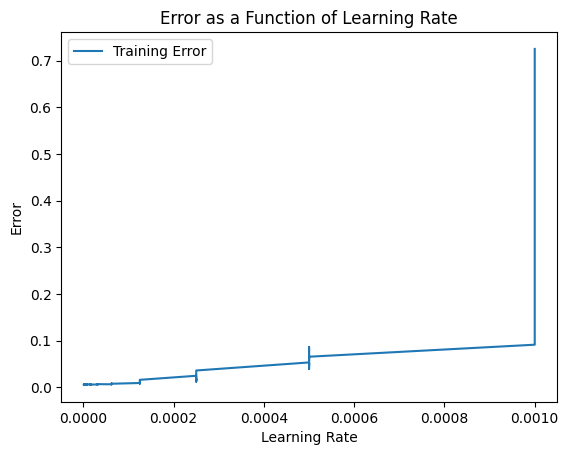

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Plot the error as a function of the learning rate over the course of training
history = pipeline.fit(X_train, y_train, model__callbacks=[lr_scheduler])

# Plot the error as a function of the learning rate over the course of training
lr_schedule = [step_decay(epoch) for epoch in range(100)]
plt.plot(lr_schedule, history.named_steps['model'].model.history.history['loss'], label='Training Error')
plt.title('Error as a Function of Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.legend()

# Display the plot
plt.show()


### Plotting the Decay Function previously used

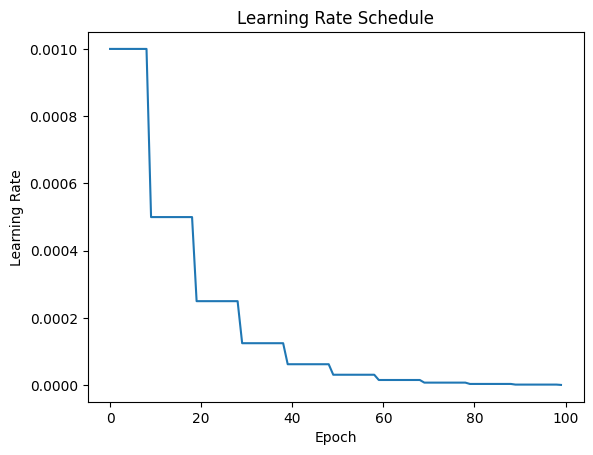

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math

def step_decay(epoch, lr):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

# Create a learning rate schedule graph
lr_schedule = [step_decay(epoch, 0) for epoch in range(100)]
plt.plot(lr_schedule)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


### Plotting different Learning Rate Scheduling functions controlling for number of epochs == 100

Here's a brief explanation of each of the learning rate scheduling functions included in the next code box:

- `Step Decay`: The learning rate is decreased by a factor of drop every epochs_drop epochs. This function gradually reduces the learning rate over time in a step-wise manner.
- `Exponential Decay`: The learning rate is decreased exponentially with a decay factor of k. This function gradually reduces the learning rate over time with a smooth curve.
- `Cosine Annealing`: The learning rate is periodically increased and decreased according to a cosine function. This function oscillates the learning rate between a maximum and a minimum value over a set number of epochs.
- `Polynomial Decay`: The learning rate is decreased with a polynomial function of order power. This function gradually reduces the learning rate over time with a curve that becomes steeper as the power increases.
- `Inverse Decay`: The learning rate is decreased with an inverse function of the epoch. This function reduces the learning rate gradually at first and then more quickly over time.
- `Triangular Decay`: The learning rate is decreased with a triangular function that oscillates between 0 and 1. This function gradually reduces the learning rate over time with a sawtooth-like pattern.
- `Staircase Decay`: The learning rate is decreased by a factor of drop every epochs_drop epochs and rounded to the nearest tenth. This function reduces the learning rate in a step-wise manner with a stair-like pattern.
- `Warmup Decay`: The learning rate is gradually increased from an initial value to a maximum value over a set number of epochs, and then gradually reduced with an exponential decay function. This function is commonly used to allow the model to stabilize before increasing the learning rate to avoid unstable behavior at the beginning of training.

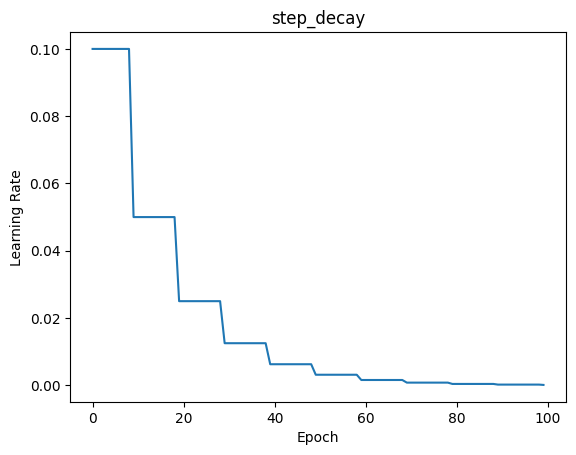

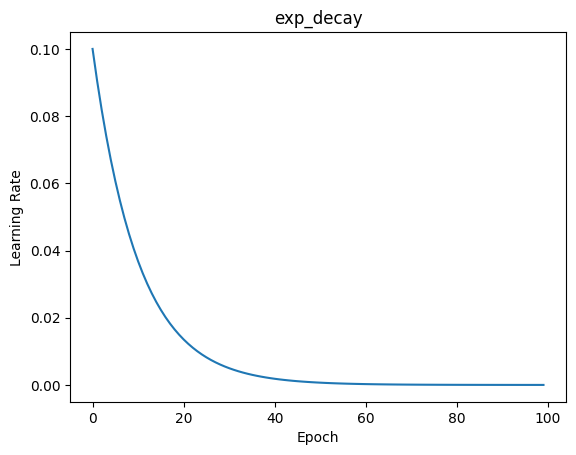

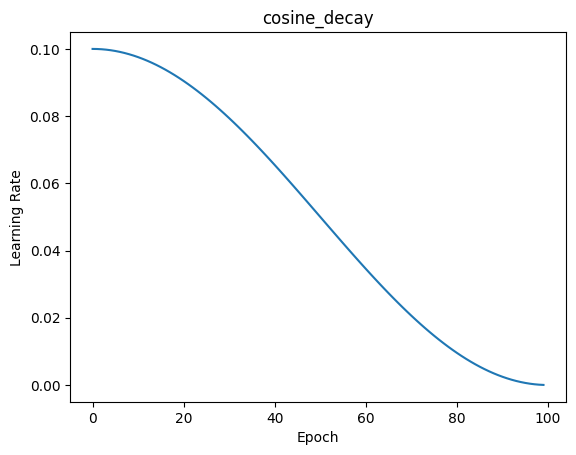

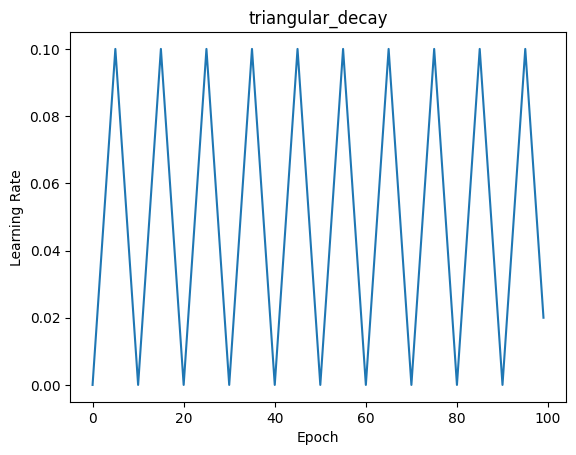

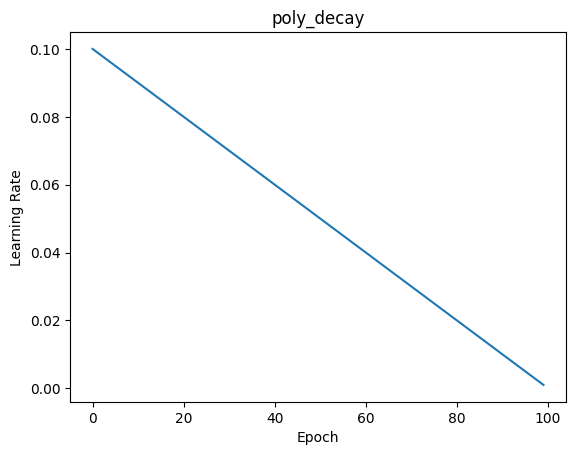

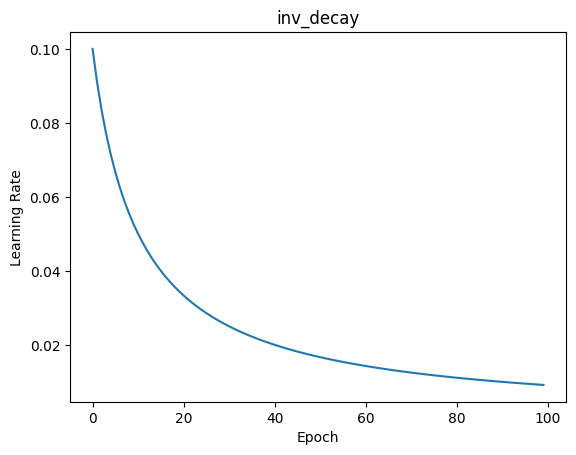

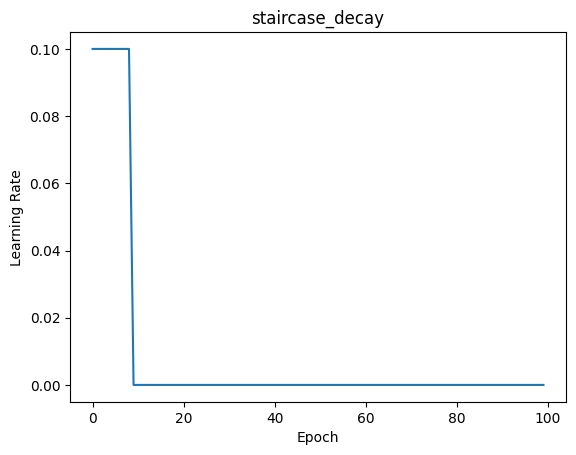

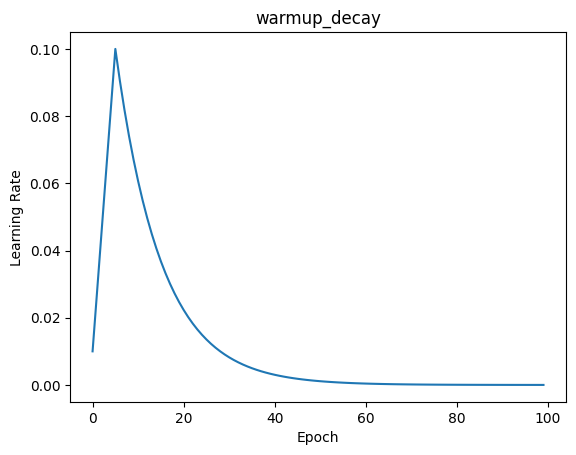

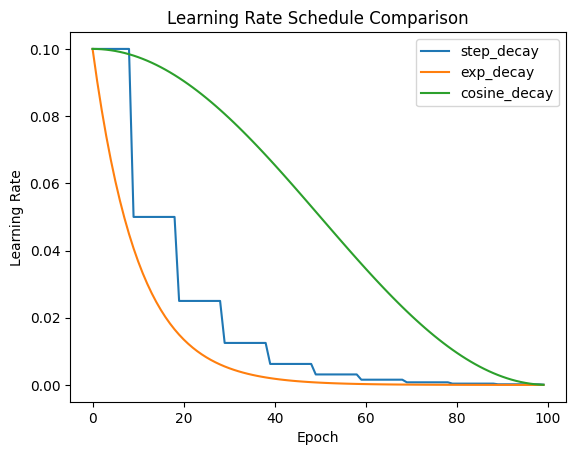

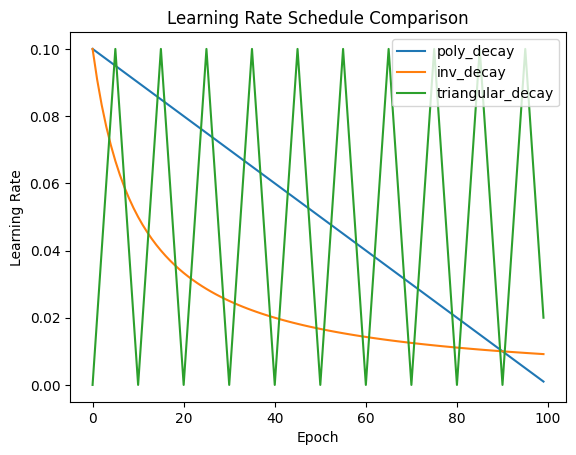

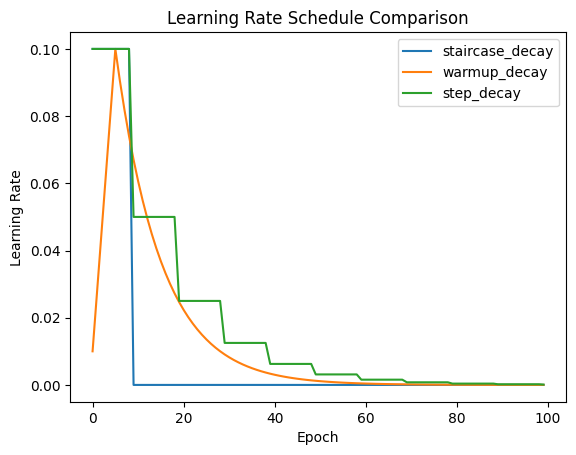

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define a step decay learning rate schedule
def step_decay(epoch, lr):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

# Define an exponential decay learning rate schedule
def exp_decay(epoch, lr):
    initial_lr = 0.1
    k = 0.1
    lr = initial_lr * np.exp(-k*epoch)
    return lr

# Define a cosine annealing learning rate schedule
def cosine_decay(epoch, lr):
    initial_lr = 0.1
    total_epochs = 100
    lr = 0.5 * initial_lr * (1 + np.cos(np.pi * epoch / total_epochs))
    return lr

# Define a triangular learning rate schedule
def triangular_decay(epoch, lr):
    initial_lr = 0.1
    total_epochs = 100
    step_size = total_epochs // 20
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    lr = initial_lr * np.maximum(0, (1 - x))
    return lr

def poly_decay(epoch, lr):
    initial_lr = 0.1
    max_epochs = 100
    power = 1.0
    lr = initial_lr * (1 - epoch / float(max_epochs)) ** power
    return lr

# Define an inverse decay learning rate schedule
def inv_decay(epoch, lr):
    initial_lr = 0.1
    decay_rate = 0.1
    lr = initial_lr / (1 + decay_rate * epoch)
    return lr

# Define a staircase decay learning rate schedule
def staircase_decay(epoch, lr):
    initial_lr = 0.1
    drop_rate = 0.5
    epochs_drop = 10
    lr = initial_lr * np.power(drop_rate, np.floor((1+epoch)/epochs_drop))
    lr = np.floor(lr * 10) / 10
    return lr

# Define a warmup learning rate schedule
def warmup_decay(epoch, lr):
    initial_lr = 0.01
    warmup_epochs = 5
    max_lr = 0.1
    if epoch < warmup_epochs:
        lr = (max_lr - initial_lr) / warmup_epochs * epoch + initial_lr
    else:
        lr = max_lr * np.exp(-0.1 * (epoch - warmup_epochs))
    return lr


# Create a learning rate schedule graph for each function
for schedule_fn in [step_decay, exp_decay, cosine_decay, triangular_decay, poly_decay, inv_decay, staircase_decay, warmup_decay]:
    lr_schedule = [schedule_fn(epoch, 0) for epoch in range(100)]
    plt.plot(lr_schedule, label=schedule_fn.__name__)
    plt.title(schedule_fn.__name__)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()
    
    
# Group functions into lists of 3 each
function_groups = [
    [step_decay, exp_decay, cosine_decay],
    [poly_decay, inv_decay, triangular_decay],
    [staircase_decay, warmup_decay, step_decay],
]

# Create a learning rate schedule graph for each group of functions
for group in function_groups:
    plt.figure()
    for schedule_fn in group:
        lr_schedule = [schedule_fn(epoch, 0) for epoch in range(100)]
        plt.plot(lr_schedule, label=schedule_fn.__name__)

    # Add plot labels and legend
    plt.title('Learning Rate Schedule Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()

# Display the plots
plt.show()

## Testing performance with each of these decay functions

In [43]:
import pandas as pd
# Define the different learning rate scheduler callbacks
callbacks = [
    LearningRateScheduler(step_decay),
    LearningRateScheduler(exp_decay),
    LearningRateScheduler(cosine_decay),
    LearningRateScheduler(triangular_decay),
    LearningRateScheduler(poly_decay),
    LearningRateScheduler(inv_decay),
    LearningRateScheduler(staircase_decay),
    LearningRateScheduler(warmup_decay)
]

# Fit the pipeline to the training data using each callback in turn
decay_functions = ['step_decay', 'exp_decay', 'cosine_decay', 'triangular_decay', 'poly_decay', 'inv_decay', 'staircase_decay', 'warmup_decay']
# Define an empty dictionary to store the results
results = {}

# Fit the pipeline to the training data using each callback in turn
for i, callback in enumerate(callbacks):
    pipeline.fit(X_train, y_train, model__callbacks=[callbacks[i]])
    
    # Evaluate the pipeline on the test data
    test_acc_lr = pipeline.score(X_test, y_test)
    
    # Store the result in the dictionary
    results[decay_functions[i]] = test_acc_lr
    
# Convert the dictionary to a Pandas DataFrame and display it
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['test_accuracy'])

# Reset the index and rename the columns
results_df = results_df.reset_index().rename(columns={'index': 'decay_function', 'test_accuracy': 'accuracy'})

print(results_df)


     decay_function  accuracy
0        step_decay  0.948608
1         exp_decay  0.940043
2      cosine_decay  0.944326
3  triangular_decay  0.948608
4        poly_decay  0.946467
5         inv_decay  0.944326
6   staircase_decay  0.944326
7      warmup_decay  0.942184


In [44]:
# Sort
results_df = results_df.sort_values(by='accuracy', ascending=False)

# Print the sorted DataFrame
print(results_df)

     decay_function  accuracy
0        step_decay  0.948608
3  triangular_decay  0.948608
4        poly_decay  0.946467
2      cosine_decay  0.944326
5         inv_decay  0.944326
6   staircase_decay  0.944326
7      warmup_decay  0.942184
1         exp_decay  0.940043


# Adding Dropout Layer and Early Stopping

- In this version, we've added three `Dropout` layers with a rate of 0.2 after the first three hidden layers. Dropout layers help to prevent overfitting by randomly dropping out (i.e., setting to zero) some of the activations from the previous layer during training. This can help to prevent the model from memorizing the training data and improve its ability to generalize to new data.


- We've also added an `EarlyStopping` callback, which monitors the loss and stops the training process if the loss does not improve for a specified number of epochs (in this case, 10). Early stopping is another technique that helps to prevent overfitting and can help to prevent the model from continuing to train and overfit the data.

- Furthermore, the new decay function is a `cosine_decay` since it showed higher performance on the previous model.

- Finally, we evaluate the pipeline on the test data and print the test accuracy with the learning rate scheduler, Dropout, and Early Stopping.

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import layers, models, optimizers, callbacks, utils
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.layers import Dense, BatchNormalization, Activation, Dropout

# Define a learning rate decay schedule
def cosine_decay(epoch):
    initial_lr = 0.1
    total_epochs = 100
    lr = 0.5 * initial_lr * (1 + np.cos(np.pi * epoch / total_epochs))
    return lr

def create_model_full(input_shape=input_shape, num_classes=num_classes):
    model = Sequential()
    model.add(Dense(512, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(units=16, activation=None))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

#model.summary()

model_full = KerasClassifier(build_fn=create_model_full, epochs=100, batch_size=32, verbose=0)

pipeline_full = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('scaler', StandardScaler()),
    ('model', model_full)
])
    

# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(cosine_decay)

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Fit the pipeline to the training data
pipeline_full.fit(X_train, y_train, model__validation_split=0.2, model__callbacks=[lr_scheduler, early_stopping])
                  

# Evaluate the pipeline on the test data
test_acc_full = pipeline_full.score(X_test, y_test)
print('Test accuracy with Learning Rate Scheduler, Dropout and Early Stopping:', test_acc_full)


C:\Users\pacos\AppData\Local\Temp\ipykernel_13468\2610036463.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_full = KerasClassifier(build_fn=create_model_full, epochs=100, batch_size=32, verbose=0)


Test accuracy with Learning Rate Scheduler, Dropout and Early Stopping: 0.9271948337554932


In [46]:
#history_full.named_steps['model'].model.history.history

### Plot Loss and Number of Epochs to understand stoppage

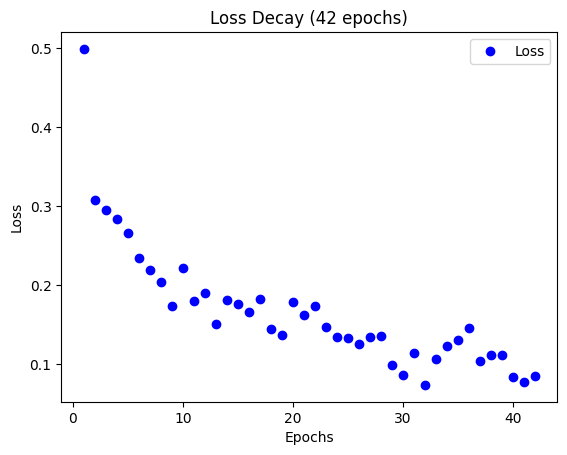

In [47]:
# Fit the pipeline to the training data
history_full = pipeline_full.fit(X_train, y_train, model__callbacks=[lr_scheduler, early_stopping])

num_epochs = len(history_full.named_steps['model'].model.history.history['loss'])
#print('Number of epochs:', num_epochs)

# Plot training loss over the epochs
train_loss = history_full.named_steps['model'].model.history.history['loss']
#val_loss = history_full.named_steps['model'].model.history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title(f'Loss Decay ({num_epochs} epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Plot Feature Importance

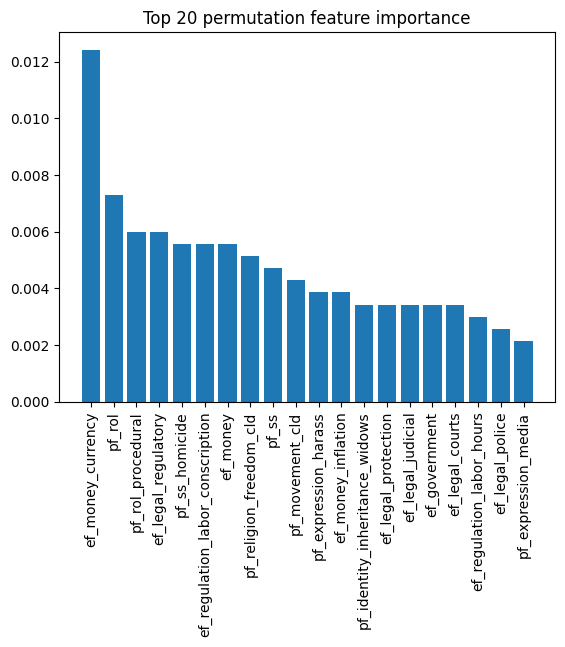

In [48]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation feature importance
imp = permutation_importance(pipeline_full, X_test, y_test)
feature_importance = pd.DataFrame({'feature': X_test.columns, 'importance': imp.importances_mean})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plot top 20 feature importances
n = 20
top_feature_importance = feature_importance.head(n)
plt.bar(top_feature_importance['feature'], top_feature_importance['importance'])
plt.xticks(rotation=90)
plt.title(f'Top {n} permutation feature importance')
plt.show()


# Increasing Architecture Complexity: Simplified Capsule Network

Sources:
- https://en.wikipedia.org/wiki/Capsule_neural_network
- https://towardsdatascience.com/capsule-networks-the-new-deep-learning-network-bd917e6818e8
- https://openreview.net/pdf?id=OgbtSLESnI
- https://medium.com/analytics-vidhya/capsule-neural-network-capsnet-3e5a3d201823

This is a Capsule Network, a type of neural network introduced by Hinton et al. in 2017. The architecture of the network consists of three main parts: the feature extractor, the capsule layer, and the decoder.

- In this specific model, the feature extractor is composed of three fully connected (Dense) layers with 512, 256, and 128 units, respectively. These layers apply a ReLU activation function, which allows the model to learn nonlinear relationships between the input data and output predictions.


- The next layer is the <b>primary capsule layer</b>, which has 32 units with a ReLU activation function. This layer helps the model to learn to recognize basic features of the input data. A batch normalization layer is added to improve the stability of the network during training.


- After the primary capsule layer, there is a <b>capsule layer</b>. The capsule layer is defined using a dense layer with no activation function, which is followed by a batch normalization layer and a ReLU activation function. This is a standard way of defining capsule layers in Keras. The dense layer with no activation is used to preserve the length of the vectors output by the capsules. The batch normalization layer is used to normalize the output of the dense layer, which improves the stability and performance of the network. The ReLU activation function is used to introduce non-linearity into the output of the batch normalization layer.


- Finally, there is an <b>output layer</b> with a softmax activation function that produces the final classification.


- The model is trained using the categorical cross-entropy loss function and the Adam optimizer.


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import layers, models, optimizers, callbacks, utils

def create_capsule_model():
    
    # Define the primary capsule layer
    x = layers.Input(shape=input_shape)
    dense1 = layers.Dense(512, activation='relu')(x)
    dense2 = layers.Dense(256, activation='relu')(dense1)
    dense3 = layers.Dense(128, activation='relu')(dense2)
    primary_caps = layers.Dense(units=32, activation='relu')(dense3)
    primary_caps = layers.BatchNormalization()(primary_caps)

    # Define the capsule layers
    digit_caps = layers.Dense(units=16, activation=None)(primary_caps)
    digit_caps = layers.BatchNormalization()(digit_caps)
    digit_caps = layers.Activation('relu')(digit_caps)

    # Define the output layer
    out_caps = layers.Dense(num_classes, activation='softmax')(digit_caps)

    # Define the model
    model_CS = models.Model(x, out_caps)
    # Compile the model
    model_CS.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])
    return model_CS

#model_CS.summary()


capsule_clf = KerasClassifier(build_fn=create_capsule_model, epochs=100, batch_size=32, verbose=0)

# Define the pipeline
pipeline_CS = Pipeline([('imputer', imputer_keras),
    ('scaler', scaler),
    ('capsule', capsule_clf)
])

# Fit the pipeline to the training data
pipeline_CS.fit(X_train, y_train)

# Evaluate the pipeline on the test data
test_acc_CS = pipeline_CS.score(X_test, y_test)
print('Test accuracy:', test_acc_CS)

C:\Users\pacos\AppData\Local\Temp\ipykernel_13468\3494132261.py:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  capsule_clf = KerasClassifier(build_fn=create_capsule_model, epochs=100, batch_size=32, verbose=0)


Test accuracy: 0.9464668035507202


The limitations of this simplified version of the Capsule Network, especially for the task of classification, are that it only uses a single layer of capsules, which limits the network's ability to learn complex spatial relationships between different features of an object. Additionally, the network architecture used in the code does not include some of the more advanced features of Capsule Networks, such as dynamic routing and reconstruction regularization.